   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
(17000, 9)
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population

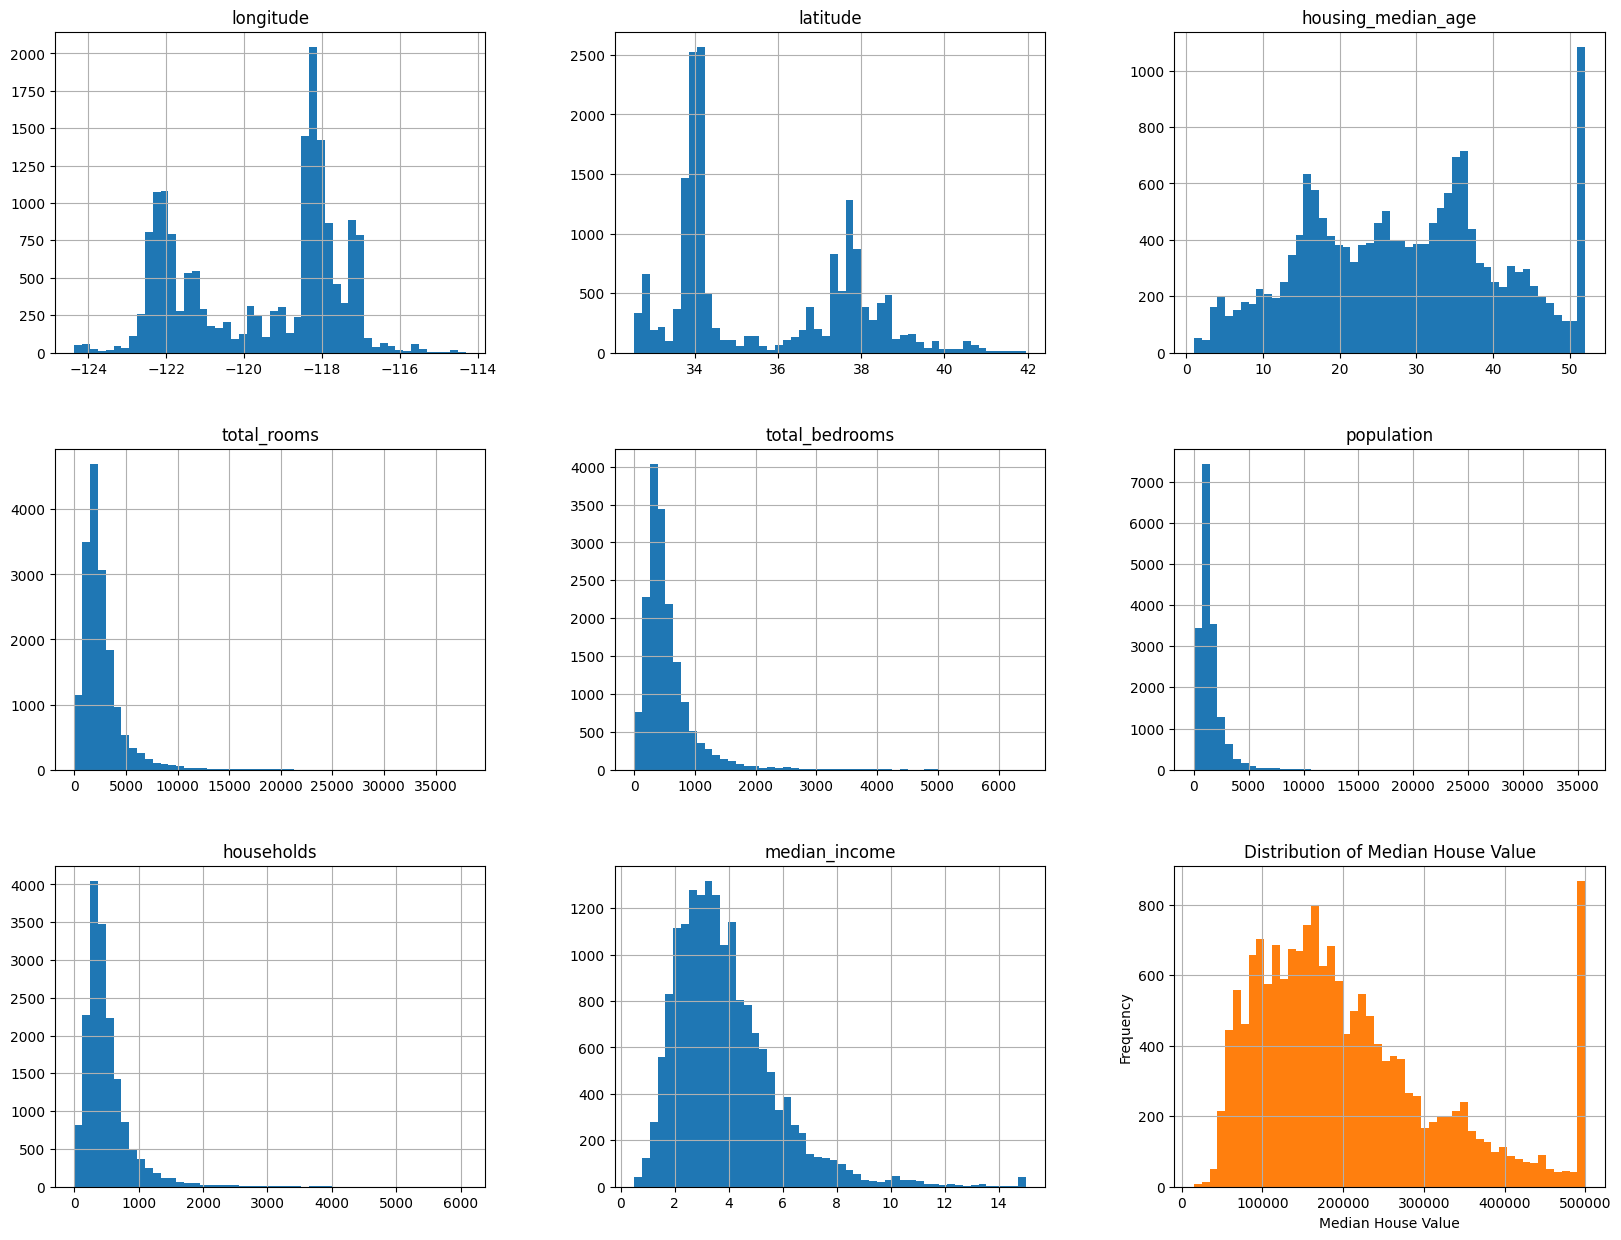

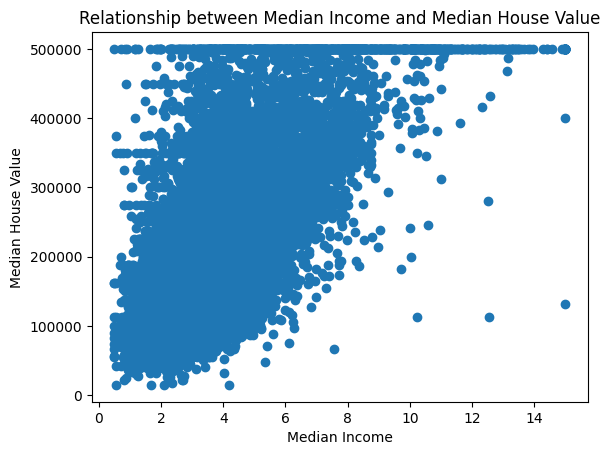

In [1]:
# prompt:  /content/sample_data/california_housing_train.csv を読み込こみ、どのようなデータがあるのか分析してください

import pandas as pd

# データの読み込み
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# データの最初の5行を表示
print(df.head())

# データの形状（行数、列数）を表示
print(df.shape)

# 各列のデータ型を表示
print(df.dtypes)

# 各列の統計量を表示
print(df.describe())

# 各列の欠損値の数を表示
print(df.isnull().sum())

# ヒストグラムを表示
df.hist(bins=50, figsize=(20,15))

# 相関係数を表示
print(df.corr())

# 特定の列の値の分布を可視化
# 例：'median_house_value' のヒストグラム
import matplotlib.pyplot as plt
df['median_house_value'].hist(bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

# 他の列についても同様に可視化や分析を行うことができます。
# 例えば、散布図で 'median_income' と 'median_house_value' の関係を見るなど
plt.scatter(df['median_income'], df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Relationship between Median Income and Median House Value')
plt.show()


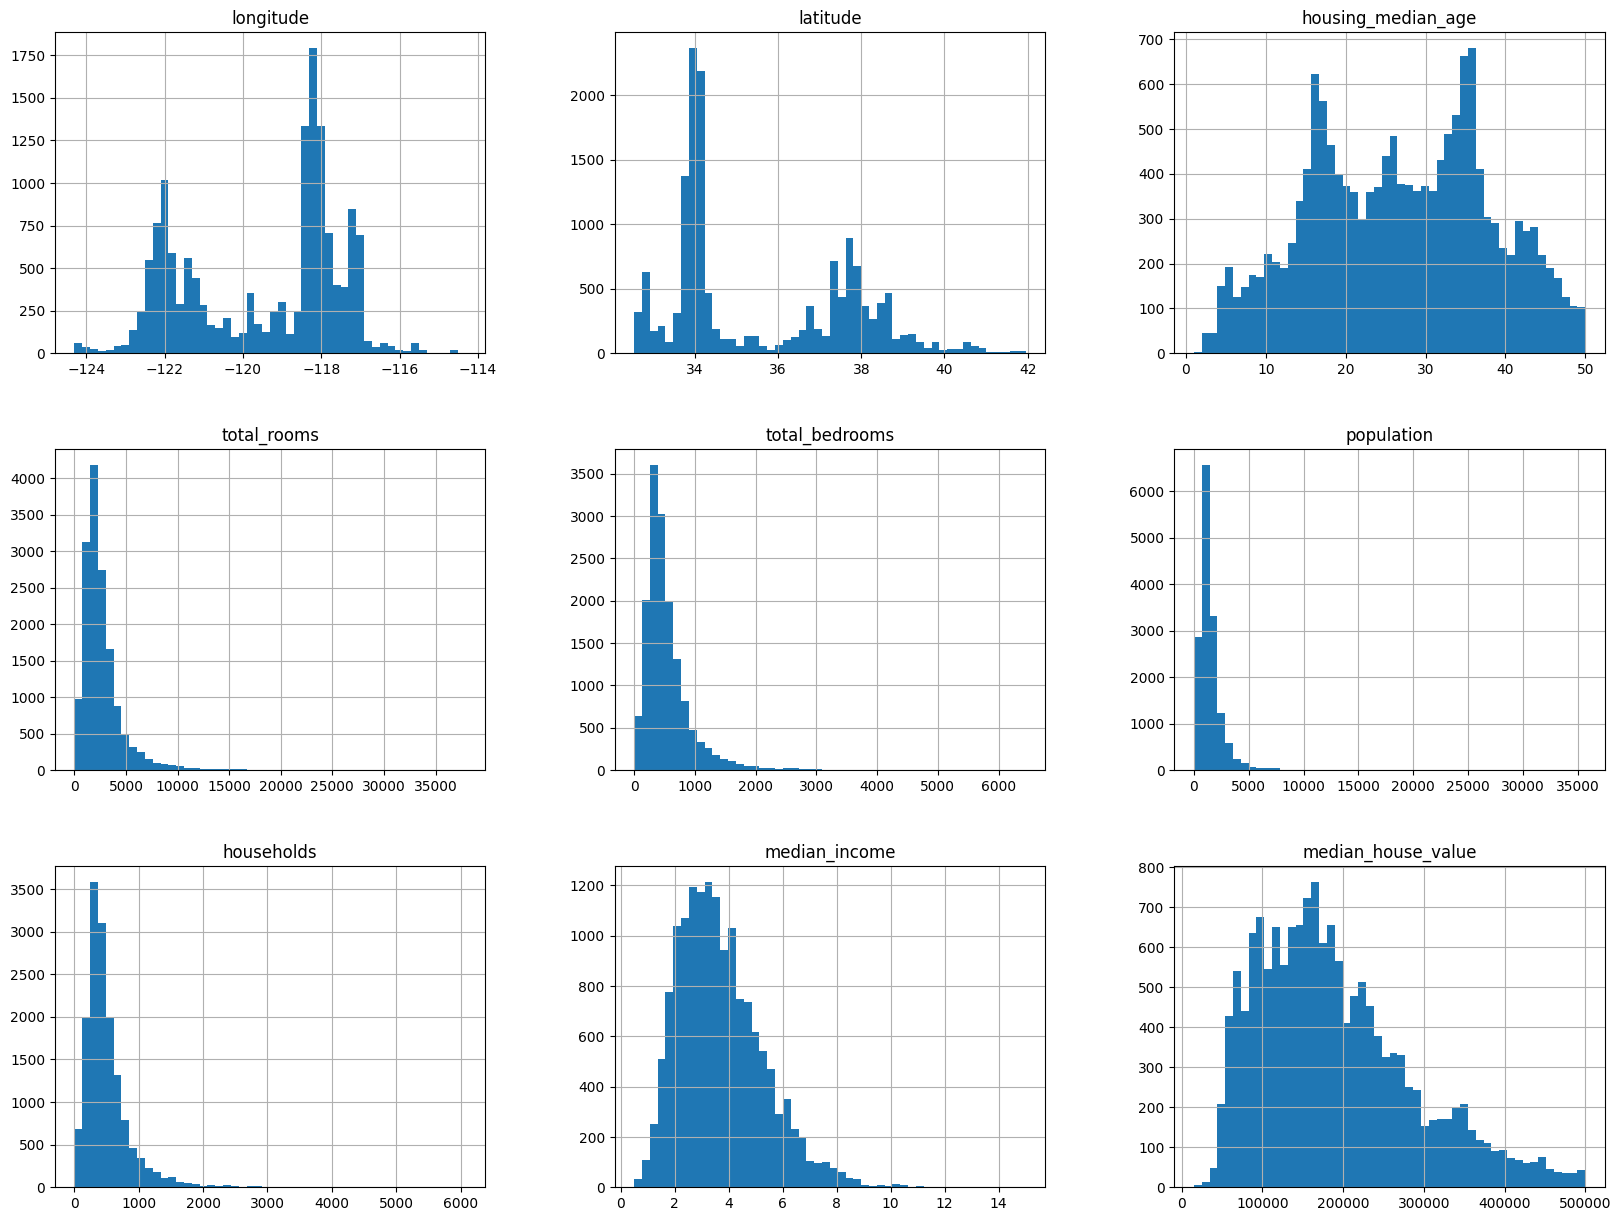

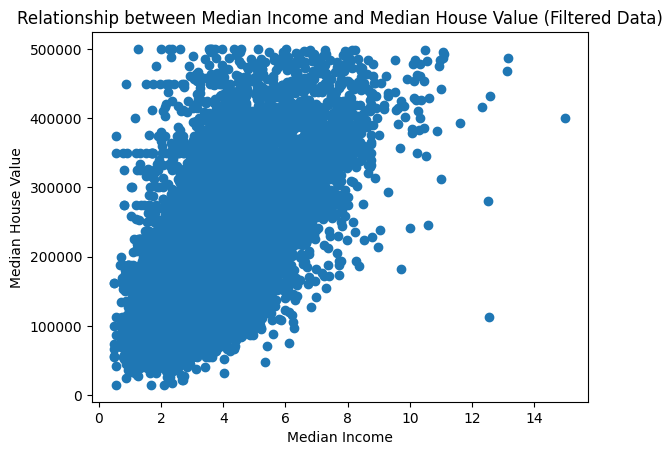

In [3]:
# prompt: 元のデータにおいてhousing_median_age が50を超えるデータはまたは median_house_value が 500000 を超えるものは除外して、新しいデータセットを作り、それを可視化してください

import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# 条件を満たすデータを削除
new_df = df[(df['housing_median_age'] <= 50) & (df['median_house_value'] <= 500000)]

# 新しいデータセットの可視化
# ヒストグラム
new_df.hist(bins=50, figsize=(20,15))
plt.show()

# 散布図
plt.scatter(new_df['median_income'], new_df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Relationship between Median Income and Median House Value (Filtered Data)')
plt.show()


In [4]:
# prompt: この新しいデータセットを用いて、median_house_value を推測するモデルを LightGBM により学習する

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# データの読み込み
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# 条件を満たすデータを削除
new_df = df[(df['housing_median_age'] <= 50) & (df['median_house_value'] <= 500000)]

# 特徴量と目的変数を定義
X = new_df.drop('median_house_value', axis=1)
y = new_df['median_house_value']

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMのデータセットを作成
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# パラメータの設定
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# モデルの学習
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)

# テストデータで予測
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# RMSEの計算
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [6]:
# prompt: この新しいデータセットを用いて、median_house_value を推測するモデルを LightGBM により学習する

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# データの読み込み
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# 条件を満たすデータを削除
new_df = df[(df['housing_median_age'] <= 50) & (df['median_house_value'] <= 500000)]

# 特徴量と目的変数を定義
X = new_df.drop('median_house_value', axis=1)
y = new_df['median_house_value']

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMのデータセットを作成
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# パラメータの設定
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# モデルの学習
# early_stopping_rounds を callbacks に移動
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=10)]) # early stopping を callback として追加

# テストデータで予測
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# RMSEの計算
# squared parameter を削除し、平方根を計算することでRMSEを求める
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE: {rmse}")

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 43441.2
RMSE: 43441.22642061243


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  fig.canvas

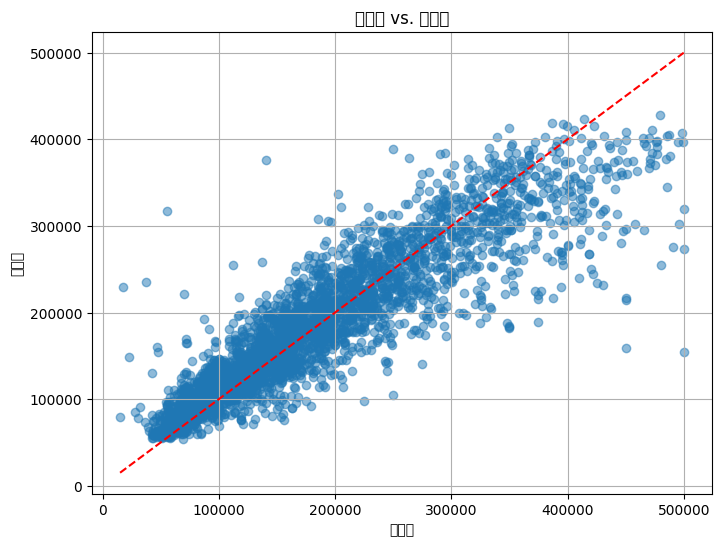

In [7]:
# prompt: 予測モデルを用いて、推測結果と正解の相関を確認するための図を作成する

import matplotlib.pyplot as plt

# 推測結果と正解の散布図を作成
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("正解値")
plt.ylabel("予測値")
plt.title("正解値 vs. 予測値")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # 理想的な予測線を追加
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

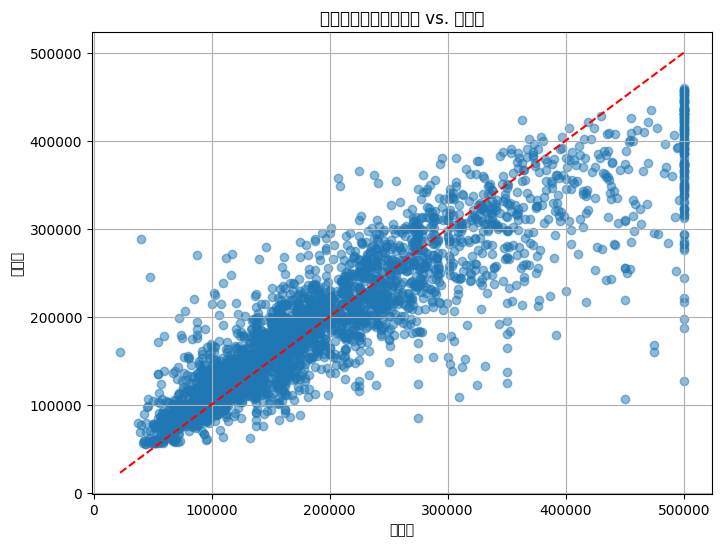

In [8]:
# prompt: /content/sample_data/california_housing_test.csv をテストデータとして読込、推測モデルを用いて median_house_value を推測する。推測した結果と正解の比較をプロットする

import pandas as pd
import matplotlib.pyplot as plt
# テストデータの読み込み
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# テストデータから目的変数と特徴量を抽出
X_test_new = test_df.drop('median_house_value', axis=1)
y_test_new = test_df['median_house_value']

# 学習済みモデルを用いてテストデータの予測値を計算
y_pred_new = gbm.predict(X_test_new, num_iteration=gbm.best_iteration)

# 推測結果と正解の散布図を作成
plt.figure(figsize=(8, 6))
plt.scatter(y_test_new, y_pred_new, alpha=0.5)
plt.xlabel("正解値")
plt.ylabel("予測値")
plt.title("テストデータ：正解値 vs. 予測値")
plt.plot([min(y_test_new), max(y_test_new)], [min(y_test_new), max(y_test_new)], color='red', linestyle='--') # 理想的な予測線を追加
plt.grid(True)
plt.show()
